In [14]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import SNOM_Import

import os

In [16]:
file_dir = "/home/conor/Desktop/SNOM Data"
file_dir = r"C:\Users\Conor\Documents\SNOM Data"

file_names = ["2345-0","2344-0","2343-0"
             ,"2317-0","2316-0","2315-0"
             ,"2321-0","2320-0","2319-0"
             ,"2328-0","2326-0","2327-0"
             ,"2311-0","2312-0","2313-0"]

# Without Gold
file_names = ["2317-0","2316-0","2315-0"
             ,"2321-0","2320-0","2319-0"
             ,"2328-0","2326-0","2327-0"
             ,"2311-0","2312-0","2313-0"]

backgrounds_file_names = ["2332-0","2331-0","2330-0"
                         ,"2340-0","2339-0","2338-0"
                         ,"2345-0","2344-0","2343-0"]

In [4]:
datasets = {"HI_C6AU_PH7_A1":  [("2268-0",1626),("2267-0",1651),("2266-0",1689)],
            "HI_C6AU_PH7_A3":  [("2272-0",1626),("2273-0",1651),("2274-0",1689)],
            "HI_C18AU_PH7_A1": [("2257-0",1626),("2258-0",1651),("2259-0",1689)],
            "HI_C18AU_PH7_A2": [("2262-z000",1626),("2261-z000",1651),("2260-z000",1689)],
            "HI_C18AU_PH7_A3": [("2263-z000",1626),("2264-z000",1651),("2265-z000",1689)],
            "HI_C6AU_PH2_A2": [("2294-0",1626),("2295-0",1651),("2296-0",1689)],
            "HI_C18AU_PH2_A1": [("2278-0",1626),("2279-0",1651),("2280-0",1689)],
            "HI_C18AU_PH2_A2": [("2283-0",1626),("2282-0",1651),("2281-0",1689)],
            "HI_C18AU_PH2_A3": [("2284-0",1626),("2285-0",1651),("2286-0",1689)]
           }

The pairings for relevant background subtractions

bg_pairs = {"2317-0": "2332-0"
           ,"2316-0": "2331-0"
           ,"2315-0": "2330-0"
           ,"2321-0": "2340-0"
           ,"2320-0": "2339-0"
           ,"2319-0": "2338-0"
           ,"2328-0": "2332-0"
           ,"2326-0": "2331-0"
           ,"2327-0": "2330-0"
           ,"2311-0": "2340-0"
           ,"2312-0": "2339-0"
           ,"2313-0": "2338-0"}

In [5]:
bg_pairs_AU = {"2317-0": "2345-0"
           ,"2316-0": "2344-0"
           ,"2315-0": "2343-0"
           ,"2321-0": "2345-0"
           ,"2320-0": "2344-0"
           ,"2319-0": "2343-0"
           ,"2328-0": "2345-0"
           ,"2326-0": "2344-0"
           ,"2327-0": "2345-0"
           ,"2311-0": "2345-0"
           ,"2312-0": "2343-0"
           ,"2313-0": "2344-0"}

#bg_pairs_AU = {value: key for key, value in bg_pairs_AU.items()}

In [9]:
from scipy.stats import mode, ttest_ind

def correct_im(im, bkg):
    
    corrected = (im/im.sensitivity)/(bkg)
    
    return corrected

In [7]:
plt.hist((background_ims_DF.loc[row.BKG]["FSNOM"]/background_ims_DF.loc[row.BKG].sensitivity).flatten())

NameError: name 'background_ims_DF' is not defined

In [89]:
mode_h(background_ims_DF.loc[row.BKG]["FSNOM"]/background_ims_DF.loc[row.BKG].sensitivity, nbins = 100)

374.086

In [10]:
def mode_h(im, nbins):
    
    y, x = np.histogram(im.flatten(), bins = nbins)
    
    return x[np.argmax(y)]

In [24]:
background_ims = {value: SNOM_Import.SNOM_File(os.path.join(file_dir, value)) for name,value in bg_pairs_AU.items()}
background_ims_DF = pd.DataFrame({name: vars(im) for name, im in background_ims.items()}).T

background_ims_DF = background_ims_DF.apply(lambda row: row.append(pd.Series(row["images"])), axis = 1)

C:\Users\Conor\Documents\SNOM Data\2345-0
Failed to load: C:\Users\Conor\Documents\SNOM Data\2345-0-FZERO.AFM
Failed to load: C:\Users\Conor\Documents\SNOM Data\2345-0-BZERO.AFM
C:\Users\Conor\Documents\SNOM Data\2344-0
Failed to load: C:\Users\Conor\Documents\SNOM Data\2344-0-FZERO.AFM
Failed to load: C:\Users\Conor\Documents\SNOM Data\2344-0-BZERO.AFM
C:\Users\Conor\Documents\SNOM Data\2343-0
Failed to load: C:\Users\Conor\Documents\SNOM Data\2343-0-FZERO.AFM
Failed to load: C:\Users\Conor\Documents\SNOM Data\2343-0-BZERO.AFM
C:\Users\Conor\Documents\SNOM Data\2345-0
Failed to load: C:\Users\Conor\Documents\SNOM Data\2345-0-FZERO.AFM
Failed to load: C:\Users\Conor\Documents\SNOM Data\2345-0-BZERO.AFM
C:\Users\Conor\Documents\SNOM Data\2344-0
Failed to load: C:\Users\Conor\Documents\SNOM Data\2344-0-FZERO.AFM
Failed to load: C:\Users\Conor\Documents\SNOM Data\2344-0-BZERO.AFM
C:\Users\Conor\Documents\SNOM Data\2343-0
Failed to load: C:\Users\Conor\Documents\SNOM Data\2343-0-FZERO.AFM


In [25]:
images = {name: SNOM_Import.SNOM_File(os.path.join(file_dir, name)) for name in file_names}

im_objects_DF = pd.DataFrame({name: vars(im) for name, im in images.items()}).T


im_objects_DF = im_objects_DF.apply(lambda row: row.append(pd.Series(row["images"])), axis = 1)
im_objects_DF["BKG"] = im_objects_DF.apply(lambda row: bg_pairs_AU[row.name], axis = 1)

im_objects_DF["FSNOM_C"] = im_objects_DF.apply(lambda row: (row["FSNOM"]/row.sensitivity)/mode_h(background_ims_DF.loc[row.BKG]["FSNOM"]/background_ims_DF.loc[row.BKG].sensitivity, nbins = 100), axis = 1)
im_objects_DF["BSNOM_C"] = im_objects_DF.apply(lambda row: (row["BSNOM"]/row.sensitivity)/mode_h(background_ims_DF.loc[row.BKG]["BSNOM"]/background_ims_DF.loc[row.BKG].sensitivity, nbins = 100), axis = 1)

C:\Users\Conor\Documents\SNOM Data\2317-0
Failed to load: C:\Users\Conor\Documents\SNOM Data\2317-0-FZERO.AFM
Failed to load: C:\Users\Conor\Documents\SNOM Data\2317-0-BZERO.AFM
C:\Users\Conor\Documents\SNOM Data\2316-0
Failed to load: C:\Users\Conor\Documents\SNOM Data\2316-0-FZERO.AFM
Failed to load: C:\Users\Conor\Documents\SNOM Data\2316-0-BZERO.AFM
C:\Users\Conor\Documents\SNOM Data\2315-0
Failed to load: C:\Users\Conor\Documents\SNOM Data\2315-0-FZERO.AFM
Failed to load: C:\Users\Conor\Documents\SNOM Data\2315-0-BZERO.AFM
C:\Users\Conor\Documents\SNOM Data\2321-0
Failed to load: C:\Users\Conor\Documents\SNOM Data\2321-0-FZERO.AFM
Failed to load: C:\Users\Conor\Documents\SNOM Data\2321-0-BZERO.AFM
C:\Users\Conor\Documents\SNOM Data\2320-0
Failed to load: C:\Users\Conor\Documents\SNOM Data\2320-0-FZERO.AFM
Failed to load: C:\Users\Conor\Documents\SNOM Data\2320-0-BZERO.AFM
C:\Users\Conor\Documents\SNOM Data\2319-0
Failed to load: C:\Users\Conor\Documents\SNOM Data\2319-0-FZERO.AFM


In [20]:
import Tissue_Analysis_Tools as TAT

C:\Users\Conor\AppData\Roaming\Python\Python36\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


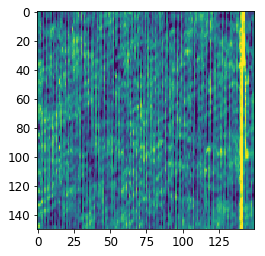

In [26]:
TAT.perc_plot(im_objects_DF.iloc[0]["FSNOM_C"], 1,99)

In [31]:
def cbar_plot(im, u_abs = None, l_abs = None, u_perc = None, l_perc = None, cmap = "viridis"):
    
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,8))      
    implot = axes[0].imshow(im, interpolation = None, vmin = u_abs, vmax = l_abs, cmap = cmap)
        
    
    cbar = plt.colorbar(implot, orientation = "horizontal")
    
    colours = np.array(cbar.get_cmap().colors).reshape(-1,3)
    n, bins, patches = axes[1].hist(im.flatten(), cbar._values)
    axes[1].set_ylabel("Frequency")
    axes[1].set_xlabel("Absorbance $(A.U)$")

    [plt.setp(p, "facecolor", c) for c, p in zip(colours, patches)]
    plt.tight_layout()

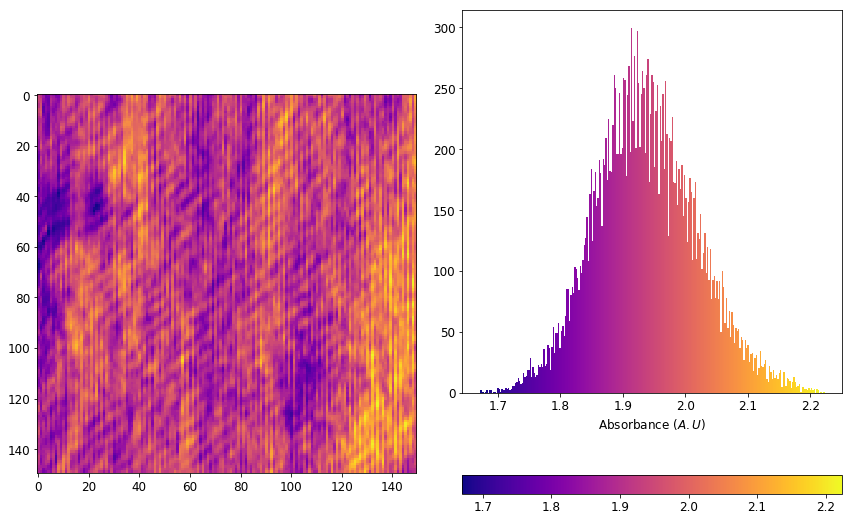

In [29]:
cbar_plot(im_objects_DF.iloc[2]["FSNOM_C"], cmap = "plasma")

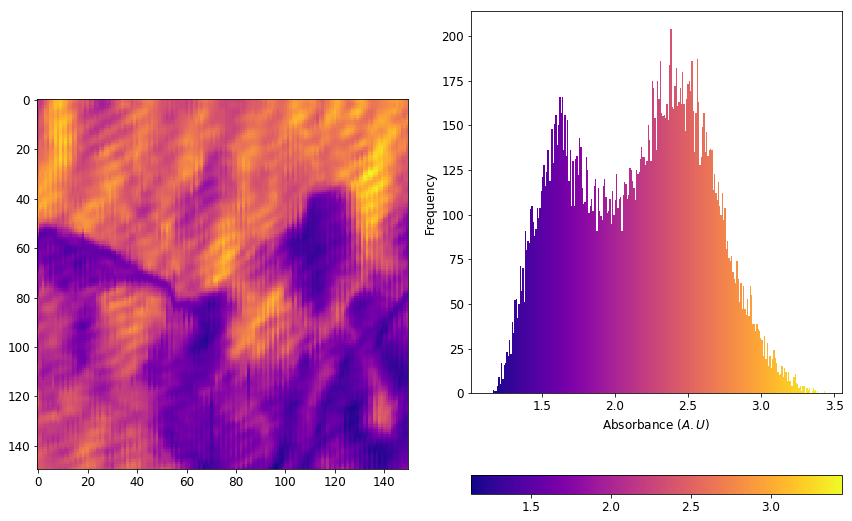

In [32]:
cbar_plot(im_objects_DF.iloc[6]["FSNOM_C"], cmap = "plasma")

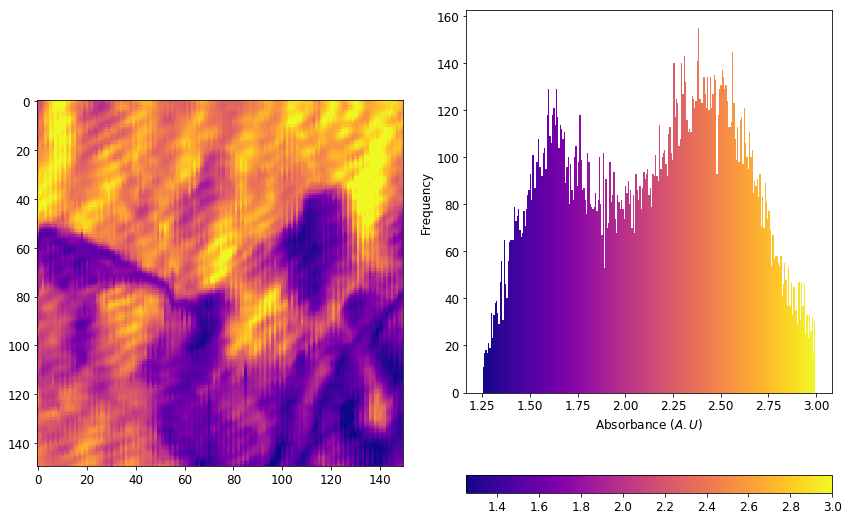

In [33]:
cbar_plot(im_objects_DF.iloc[6]["FSNOM_C"], 1.25, 3, cmap = "plasma")

In [35]:
background_ims_DF.loc[:,["sensitivity", "substrate", "wavenumber"]]

,sensitivity,substrate,wavenumber
2345-0,5.0,Scan,1626.0
2344-0,5.0,Scan,1651.0
2343-0,5.0,Scan,1689.0


In [36]:
for name, row in pd.concat([im_objects_DF, background_ims_DF], axis = 0).iterrows():
    for im_name in ["FSNOM","BSNOM", "FTOPO", "BTOPO"]:
    
        np.savetxt("/home/conor/Desktop/Stuff_for_Nathan/Raw_plots/{}_{}.csv".format(name,im_name)
                   , row[im_name])
    
    try:
        for im_name in ["FSNOM_C", "BSNOM_C"]:
            np.savetxt("/home/conor/Desktop/Stuff_for_Nathan/Corrected_Plots/{}_{}.csv".format(name,im_name)
                   , row[im_name])
    except: pass

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


FileNotFoundError: [Errno 2] No such file or directory: '/home/conor/Desktop/Stuff_for_Nathan/Raw_plots/2317-0_FSNOM.csv'

In [37]:
background_ims

{'2345-0': <SNOM_Import.SNOM_File at 0x25f3e66a2b0>,
 '2344-0': <SNOM_Import.SNOM_File at 0x25f3e66a208>,
 '2343-0': <SNOM_Import.SNOM_File at 0x25f3e66a4a8>}

In [101]:
plt.figure(figsize = (10,10))
plt.imshow(im_objects_DF.loc["2328-0"]["images"]["FSNOM_C"], vmin = 5000, vmax = 7500)
plt.colorbar()

KeyError: 'FSNOM_C'

<Figure size 720x720 with 0 Axes>

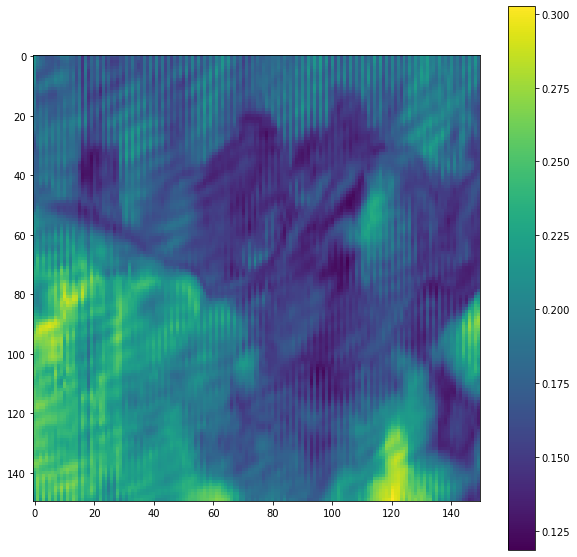

In [72]:
plt.figure(figsize = (10,10))
plt.imshow((im_objects_DF.loc["2326-0"]["images"]["FSNOM"]/im_objects_DF.loc["2326-0"].sensitivity)/3077)
plt.colorbar()

In [66]:
mode(np.concatenate([background_ims["2345-0"].images["FSNOM"]
                , background_ims["2345-0"].images["BSNOM"]]
               , axis = 1).flatten())[0]

array([2938], dtype=int16)

In [73]:
mode(background_ims["2345-0"].images["FSNOM"].flatten())[0]

array([3077], dtype=int16)

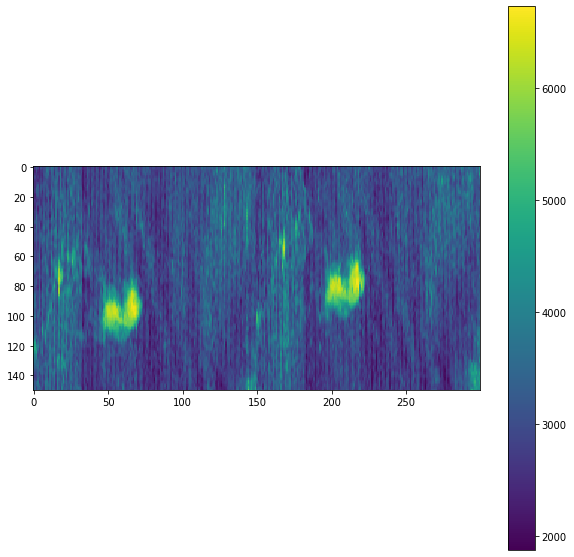

In [65]:
plt.figure(figsize = (10,10))
plt.imshow(np.concatenate([background_ims["2345-0"].images["FSNOM"]
                          , background_ims["2345-0"].images["BSNOM"]], axis = 1))
plt.colorbar()

(array([   9.,  130.,  382.,  682.,  875., 1097., 1310., 1086., 1046.,
         912.,  913.,  910.,  992., 1077., 1250., 1379., 1466., 1426.,
        1349., 1199.,  936.,  679.,  479.,  385.,  234.,  141.,   88.,
          44.,   19.,    5.]),
 array([ 3518.        ,  3758.96666667,  3999.93333333,  4240.9       ,
         4481.86666667,  4722.83333333,  4963.8       ,  5204.76666667,
         5445.73333333,  5686.7       ,  5927.66666667,  6168.63333333,
         6409.6       ,  6650.56666667,  6891.53333333,  7132.5       ,
         7373.46666667,  7614.43333333,  7855.4       ,  8096.36666667,
         8337.33333333,  8578.3       ,  8819.26666667,  9060.23333333,
         9301.2       ,  9542.16666667,  9783.13333333, 10024.1       ,
        10265.06666667, 10506.03333333, 10747.        ]),
 <a list of 1 Patch objects>)

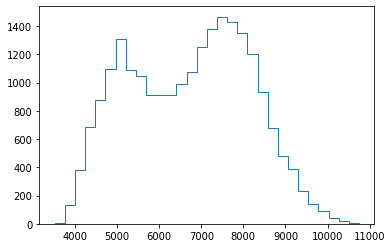

In [36]:
plt.hist(im_objects_DF.loc["2328-0"]["images"]["FSNOM"].flatten(), histtype = "step", bins = 30)

In [46]:
im_objects_DF.head()

,HEADR,fileName,images,pH,sensitivity,substrate,wavenumber,FTOPO,FSNOM,BTOPO,BSNOM,BKG,FSNOM_C,BSNOM_C
2317-0,Number of Files 4 \n\nStart time=...,C:\Users\Conor\Documents\SNOM Data\2317-0,"{'FTOPO': [[19995, 19614, 19786, 21278, 19164,...",7.0,5.0,C6/Au,1626.0,"[[19995, 19614, 19786, 21278, 19164, 19675, 18...","[[5377, 5707, 5627, 4845, 5929, 4864, 5846, 49...","[[19149, 19277, 20190, 18186, 20663, 18905, 19...","[[5680, 5323, 5327, 6126, 4923, 5862, 4769, 48...",2345-0,"[[1.7218797534224644, 1.8275558402049479, 1.80...","[[1.959350378761746, 1.8362010679839387, 1.837..."
2316-0,Number of Files 4 \n\nStart time=...,C:\Users\Conor\Documents\SNOM Data\2316-0,"{'FTOPO': [[26213, 26295, 27119, 26908, 26407,...",7.0,5.0,C6/Au,1651.0,"[[26213, 26295, 27119, 26908, 26407, 27600, 25...","[[2254, 2347, 2349, 2377, 2431, 2358, 2379, 22...","[[26824, 26774, 27079, 26274, 27907, 25188, 27...","[[2443, 2426, 2397, 2416, 2345, 2333, 2201, 22...",2344-0,"[[1.2050704918120432, 1.2547916789187512, 1.25...","[[1.3001596593932943, 1.2911122937732835, 1.27..."
2315-0,Number of Files 4 \n\nStart time=...,C:\Users\Conor\Documents\SNOM Data\2315-0,"{'FTOPO': [[24121, 24343, 21208, 24131, 23097,...",7.0,5.0,C6/Au,1689.0,"[[24121, 24343, 21208, 24131, 23097, 25197, 24...","[[3325, 3271, 3166, 3071, 3114, 3191, 3156, 30...","[[24143, 21984, 22933, 23159, 24374, 25033, 23...","[[3158, 3186, 3143, 3148, 3171, 3114, 3128, 31...",2343-0,"[[1.9355026485825715, 1.9040689213574713, 1.84...","[[1.8079083107678742, 1.823937896803815, 1.799..."
2321-0,Number of Files 4 \n\nStart time=...,C:\Users\Conor\Documents\SNOM Data\2321-0,"{'FTOPO': [[9533, 11195, 10539, 9970, 9872, 95...",7.0,5.0,C18/Au,1626.0,"[[9533, 11195, 10539, 9970, 9872, 9546, 9143, ...","[[3259, 2584, 2700, 2688, 2834, 3061, 3146, 33...","[[10588, 9589, 10035, 9897, 8872, 8921, 8260, ...","[[3129, 3002, 3081, 3271, 3391, 3563, 3642, 35...",2345-0,"[[1.0436314146185253, 0.8274757825634457, 0.86...","[[1.0793674885819546, 1.0355580699018945, 1.06..."
2320-0,Number of Files 4 \n\nStart time=...,C:\Users\Conor\Documents\SNOM Data\2320-0,"{'FTOPO': [[16598, 14371, 16773, 16727, 17071,...",7.0,5.0,C18/Au,1651.0,"[[16598, 14371, 16773, 16727, 17071, 16690, 16...","[[1475, 1222, 1186, 1180, 1223, 1400, 1432, 16...","[[15337, 17107, 16846, 16889, 16805, 16432, 16...","[[1232, 1239, 1329, 1423, 1578, 1500, 1730, 15...",2344-0,"[[0.7885887202408002, 0.6533257058537342, 0.63...","[[0.6556679084619479, 0.6593932943054817, 0.70..."


In [119]:
output_dict = dict()

dir_ = os.path.join(os.getcwd(), "Nathan's Plots")
try: os.mkdir(dir_)
except: pass

for name, row in im_objects_DF.iterrows():
    
    row_dict = dict()
    
    combined = np.concatenate([row["FSNOM_C"], row["BSNOM_C"]])
    
    row_dict["Frequency"], b = np.histogram(combined.flatten(), bins = 20, density = True)
    #row_dict["Heights"], b, _ = plt.hist(combined.flatten(), bins = 20, density = True)
    
    row_dict["MCT Signal (mV)"] = (b[1:] + b[:-1])/2
    
    pd.DataFrame(row_dict).to_csv(os.path.join(dir_, "{}.csv".format(name)))
    
output_dict = pd.DataFrame(output_dict)

In [113]:
dir_ = os.path.join(os.getcwd(), "Nathan's Plots")
os.mkdir(dir_)

for name, 

,Centres,Heights
2317-0,"[1.280739590979696, 1.3489035860044947, 1.4170...","[0.003912133767535935, 0.028036958667340958, 0..."
2316-0,"[0.893321217838486, 0.919452743456916, 0.94558...","[0.005102393763006937, 0.049323139709067064, 0..."
2315-0,"[1.6553151908297452, 1.6844603168459629, 1.713...","[0.006862210850922759, 0.04803547595645894, 0...."
2321-0,"[0.6020160002486711, 0.6826791751916139, 0.763...","[0.04380354896559222, 0.3286643642512679, 0.94..."
2320-0,"[0.45341546815042655, 0.500214472572621, 0.547...","[0.046059859224981424, 0.14957583150380582, 0...."
2319-0,"[0.7678255960251334, 0.9089028029485662, 1.049...","[0.07907411692386308, 0.5555665545626794, 1.21..."
2328-0,"[1.1912862700963662, 1.3207165478601497, 1.450...","[0.015108949693552715, 0.1450802555801366, 0.4..."
2326-0,"[1.0137697359263413, 1.090955545786862, 1.1681...","[0.05614158018376608, 0.41170492134761677, 1.1..."
2327-0,"[0.5619269952574291, 0.5893115277625199, 0.616...","[0.043820357341390295, 0.27996339412554794, 0...."
2311-0,"[0.693150899453562, 0.8568123973439536, 1.0204...","[0.010998310679067019, 0.14243491237458397, 0...."


In [115]:
output_dict.T.iloc[0]

Centres    [1.280739590979696, 1.3489035860044947, 1.4170...
Heights    [0.003912133767535935, 0.028036958667340958, 0...
Name: 2317-0, dtype: object


2321-0 - 2311-0:- P:0.0 T:-231.7660371531633
Difference: -0.41639951650199736

2317-0 - 2328-0:- P:0.0 T:-153.15774937166267
Difference: 0.16437618246794194

2320-0 - 2313-0:- P:0.0 T:-307.48325228244516
Difference: -0.4385354946897708

2316-0 - 2326-0:- P:0.0 T:-294.8431845245024
Difference: -0.2125992174399105

2319-0 - 2312-0:- P:0.0 T:-217.82722504628157
Difference: -0.5255815018577144

2315-0 - 2327-0:- P:0.0 T:2150.797768312395
Difference: 1.1178354233826444


Text(0.5, 0, 'MCT_signal (mV) ( ---> Increasing amount of protein)')

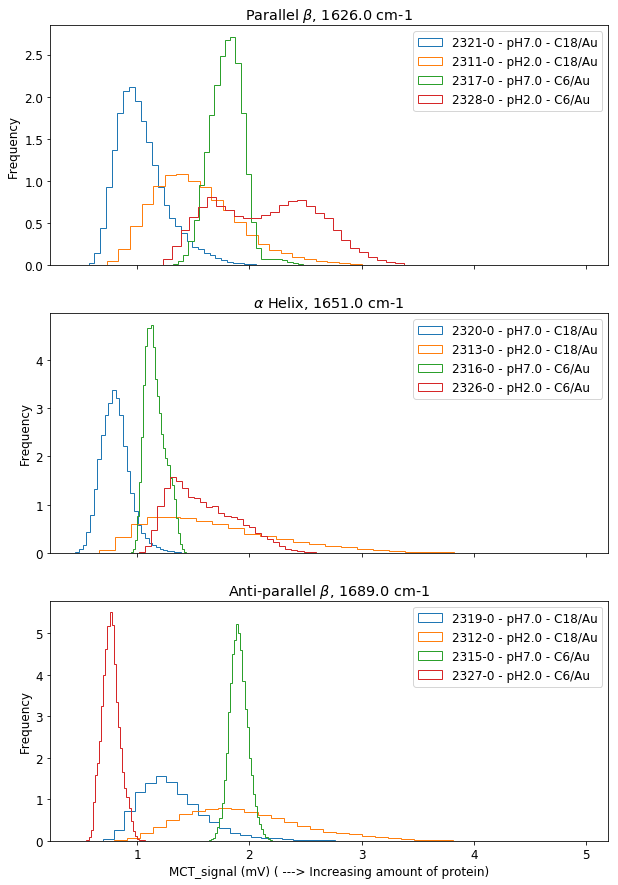

In [42]:
from scipy.stats import mode, ttest_ind

title = "Wavenumber"

fig, axes = plt.subplots(ncols = 1, nrows = 3, figsize = (10,15), sharex = True)

axes_f = axes.flatten()
i = 0

fig.set_title = title

for wn, df in im_objects_DF.groupby("wavenumber"):
    
    axes_f[i].set_title("{}, {} cm-1".format(labels[int(wn)], wn))
    
    for substrate, df in df.groupby("substrate"):
        
        list_ = dict()
        
        for name, im_object in df.iterrows():
            
            # Load in FSNOM and BSNOM for the scan, correct for sensitivity and flatten
            fsnom = (im_object["images"]["FSNOM"]/im_object.sensitivity).flatten()
            bsnom = (im_object["images"]["BSNOM"]/im_object.sensitivity).flatten()
            
            bkg_im_obj = background_ims[bg_pairs_AU[name]]

            f_bkg = (bkg_im_obj.images["FSNOM"]/bkg_im_obj.sensitivity).flatten()
            b_bkg = (bkg_im_obj.images["BSNOM"]/bkg_im_obj.sensitivity).flatten()

            hist = np.concatenate([fsnom,bsnom]) / mode_h(np.concatenate([f_bkg, b_bkg]), nbins = 100)
            
            list_[name] = hist
            
            axes_f[i].hist((hist)
                     , label = "{} - pH{} - {}".format(name, im_object.pH, substrate)
                     , bins = 30
                     , histtype = "step"
                     , density = True)
            
        
        axes_f[i].legend()
        axes_f[i].set_ylabel("Frequency")
        
        
        keys = list(list_.keys())
        values = list(list_.values())
        
        t,p = ttest_ind(values[0], values[1], equal_var = False)
        
        print("\n{} - {}:- P:{} T:{}".format(keys[0], keys[1], p, t))
        print("Difference: {}".format(mode_h(values[0], nbins = 100) - mode_h(values[1], nbins = 100)))
        #print("Difference: {}".format(np.mean(values[0]) - np.mean(values[1])))

    
    i = i+1
    
plt.xlabel("MCT_signal (mV) ( ---> Increasing amount of protein)")
#plt.savefig(os.path.join(os.getcwd(), "/Stuff_for_Nathan/Graphs", title + ".png"), bbox_inches = "tight")


2328-0 - 2311-0:- P:0.0 T:214.8422492443299
Difference: 0.3648964683624132

2326-0 - 2313-0:- P:3.864155668570089e-220 T:-31.791691121266773
Difference: 0.09005030743432085

2327-0 - 2312-0:- P:0.0 T:-475.07319924839476
Difference: -0.9332318407701653

2317-0 - 2321-0:- P:0.0 T:588.6245893347543
Difference: 0.9456721673323525

2316-0 - 2320-0:- P:0.0 T:479.93877212209895
Difference: 0.31598658468418117

2315-0 - 2319-0:- P:0.0 T:377.58060968522113
Difference: 0.7101850844701936


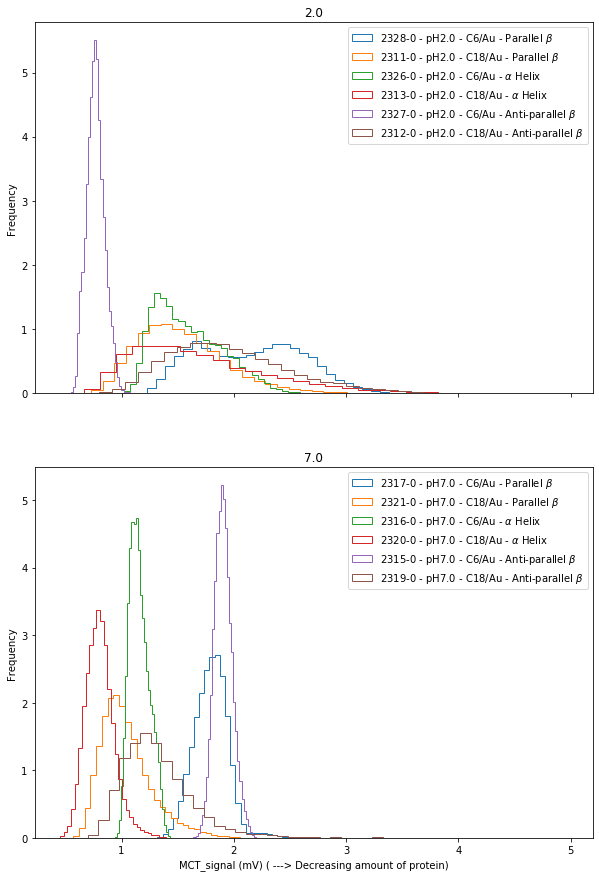

In [125]:
from scipy.stats import mode, ttest_ind

title = "pH"

fig, axes = plt.subplots(ncols = 1, nrows = 2, figsize = (10,15), sharex = True)

axes_f = axes.flatten()
i = 0

fig.set_title = title

for wn, df in im_objects_DF.groupby("pH"):
    
    try: 
        axes_f[i].set_title("pH{}, {} cm-1".format(labels[wn], wn))
        
    except:
        
        axes_f[i].set_title(wn)
    
    for substrate, df in df.groupby("wavenumber"):
        
        list_ = dict()
        
        for name, im_object in df.iterrows():
            
            # Load in FNOM and BSNOM for the scan, correct for sensitivity and flatten
            fsnom = (im_object["images"]["FSNOM"]/im_object.sensitivity).flatten()
            bsnom = (im_object["images"]["BSNOM"]/im_object.sensitivity).flatten()
            
            bkg_im_obj = background_ims[bg_pairs_AU[name]]

            f_bkg = (bkg_im_obj.images["FSNOM"]/bkg_im_obj.sensitivity).flatten()
            b_bkg = (bkg_im_obj.images["BSNOM"]/bkg_im_obj.sensitivity).flatten()

            hist = np.concatenate([fsnom,bsnom]) / mode_h(np.concatenate([f_bkg, b_bkg]), nbins = 100)
            
            list_[name] = hist
            
            axes_f[i].hist((hist)
                     , label = "{} - pH{} - {} - {}".format(name, im_object.pH, im_object.substrate, labels[im_object.wavenumber])
                     , bins = 30
                     , histtype = "step"
                     , density = True)
            
        
        axes_f[i].legend()
        axes_f[i].set_ylabel("Frequency")
        
        
        keys = list(list_.keys())
        values = list(list_.values())
        
        t,p = ttest_ind(values[0], values[1], equal_var = False)
        
        print("\n{} - {}:- P:{} T:{}".format(keys[0], keys[1], p, t))
        print("Difference: {}".format(mode_h(values[0], nbins = 100) - mode_h(values[1], nbins = 100)))
        #print("Difference: {}".format(np.mean(values[0]) - np.mean(values[1])))

    
    i = i+1
    
plt.xlabel("MCT_signal (mV) ( ---> Decreasing amount of protein)")
plt.savefig(os.path.join("/home/conor/Desktop/Stuff_for_Nathan/Graphs", title + ".png"), bbox_inches = "tight")


2321-0_2311-0:- P:0.0 T:-231.7660371531633
Difference: -0.41639951650199736

2320-0_2313-0:- P:0.0 T:-307.48325228244516
Difference: -0.4385354946897708

2319-0_2312-0:- P:0.0 T:-217.82722504628157
Difference: -0.5255815018577144

2317-0_2328-0:- P:0.0 T:-153.15774937166267
Difference: 0.16437618246794194

2316-0_2326-0:- P:0.0 T:-294.8431845245024
Difference: -0.2125992174399105

2315-0_2327-0:- P:0.0 T:2150.797768312395
Difference: 1.1178354233826444


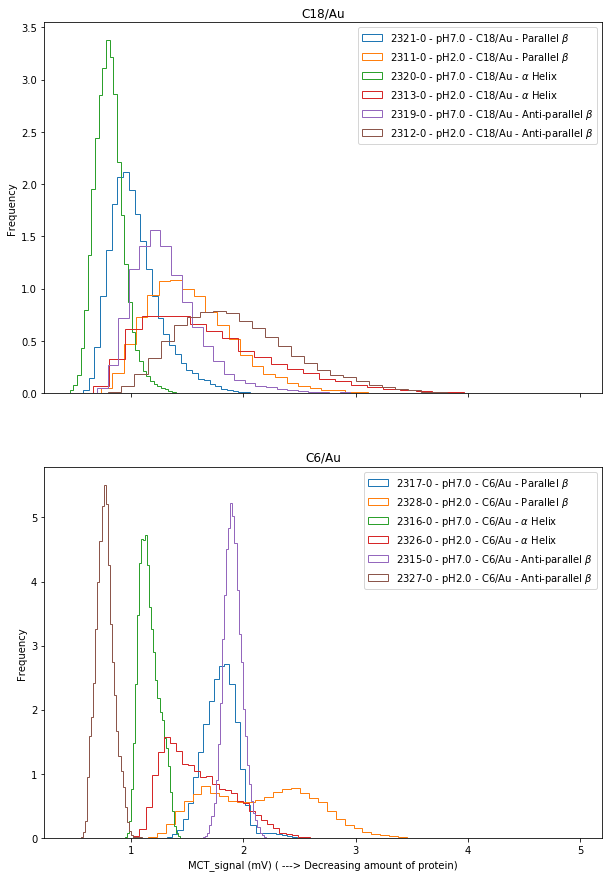

In [126]:
from scipy.stats import mode, ttest_ind

title = "substrate"

fig, axes = plt.subplots(ncols = 1, nrows = 2, figsize = (10,15), sharex = True)

axes_f = axes.flatten()
i = 0

fig.set_title = title

for wn, df in im_objects_DF.groupby("substrate"):
    
    try: 
        axes_f[i].set_title("{}, {} cm-1".format(labels[wn], wn))
        
    except:
        
        axes_f[i].set_title(wn)
    
    for substrate, df in df.groupby("wavenumber"):
        
        list_ = dict()
        
        for name, im_object in df.iterrows():
            
            # Load in FNOM and BSNOM for the scan, correct for sensitivity and flatten
            fsnom = (im_object["images"]["FSNOM"]/im_object.sensitivity).flatten()
            bsnom = (im_object["images"]["BSNOM"]/im_object.sensitivity).flatten()
            
            bkg_im_obj = background_ims[bg_pairs_AU[name]]

            f_bkg = (bkg_im_obj.images["FSNOM"]/bkg_im_obj.sensitivity).flatten()
            b_bkg = (bkg_im_obj.images["BSNOM"]/bkg_im_obj.sensitivity).flatten()

            hist = np.concatenate([fsnom,bsnom]) / mode_h(np.concatenate([f_bkg, b_bkg]), nbins = 100)
            
            list_[name] = hist
            
            axes_f[i].hist((hist)
                     , label = "{} - pH{} - {} - {}".format(name, im_object.pH, im_object.substrate, labels[im_object.wavenumber])
                     , bins = 30
                     , histtype = "step"
                     , density = True)
            
        
        axes_f[i].legend()
        axes_f[i].set_ylabel("Frequency")
        
        
        keys = list(list_.keys())
        values = list(list_.values())
        
        t,p = ttest_ind(values[0], values[1], equal_var = False)
        
        print("\n{}_{}:- P:{} T:{}".format(keys[0], keys[1], p, t))
        print("Difference: {}".format(mode_h(values[0], nbins = 100) - mode_h(values[1], nbins = 100)))
        #print("Difference: {}".format(np.mean(values[0]) - np.mean(values[1])))

    
    i = i+1
    
plt.xlabel("MCT_signal (mV) ( ---> Decreasing amount of protein)")
plt.savefig(os.path.join("/home/conor/Desktop/Stuff_for_Nathan/Graphs", title + ".png"), bbox_inches = "tight")

In [39]:
labels = {1651: r"$\alpha$ Helix",
          1626: r"Parallel $\beta$",
          1689: r"Anti-parallel $\beta$"}

In [221]:
np.concatenate([fsnom,bsnom])/mode(np.concatenate([f_bkg, b_bkg]))

array([[ 3.29307116,  3.4428839 ,  3.34269663, ...,  4.07116105,
         4.37921348,  4.26685393],
       [18.51052632, 19.35263158, 18.78947368, ..., 22.88421053,
        24.61578947, 23.98421053]])

In [223]:
mode(np.concatenate([f_bkg, b_bkg]))[0]

array([1068], dtype=int16)

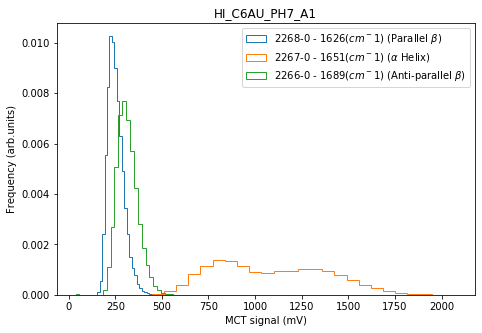

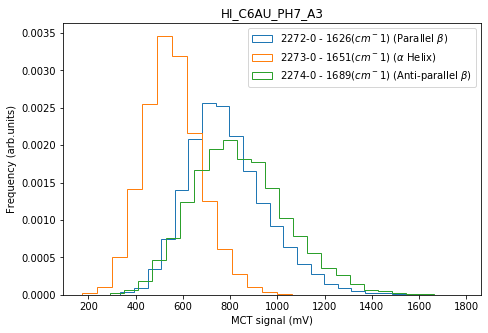

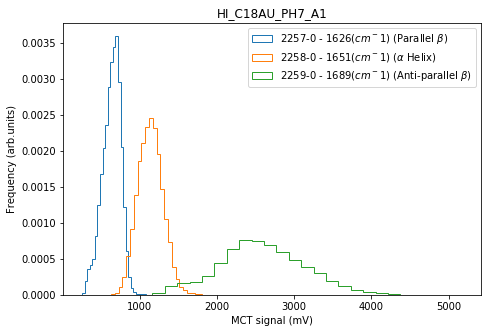

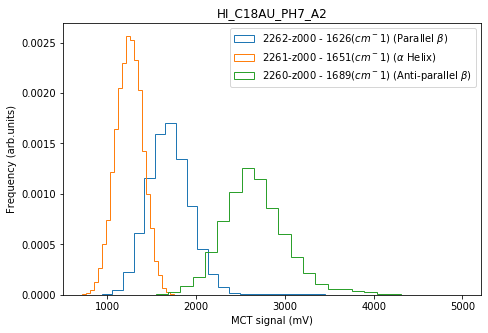

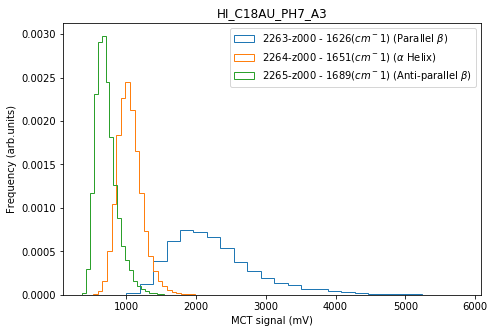

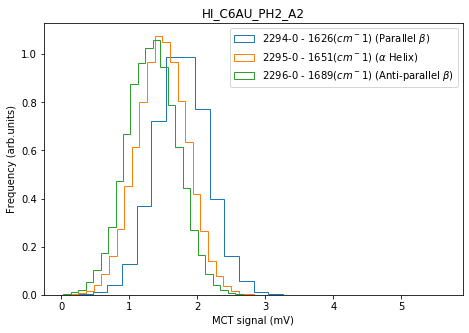

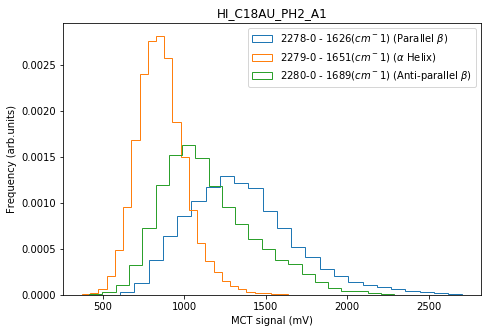

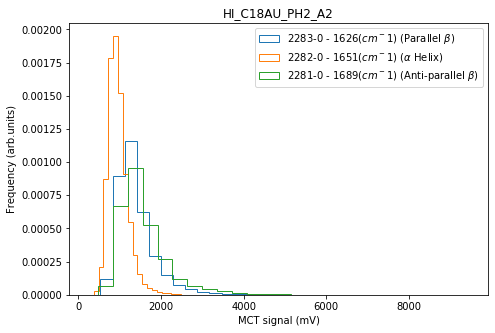

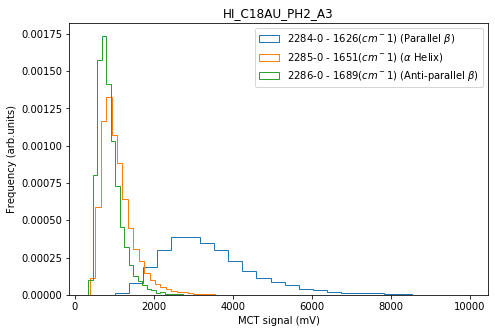

In [25]:
for data_set_name, dataset in datasets.items():

    plt.figure(figsize = (7.5,5))

    for im in dataset:

        img = SNOM_Import.SNOM_File(os.path.join(file_dir, im[0]))

        plt.hist((img.images["FSNOM"].image/img.sensitivity).flatten()
                 , label = "{} - {}$(cm^-1)$ ({})".format(im[0], im[1], labels[im[1]])
                 , histtype = "step"
                 , bins = 25
                 , density = True)
        
    plt.title(data_set_name)
    plt.xlabel("MCT signal (mV)")
    plt.ylabel("Frequency (arb.units)")
    plt.legend()
    plt.savefig(os.path.join("/home/conor/Desktop/Insulin_Histograms_Run_2", data_set_name))

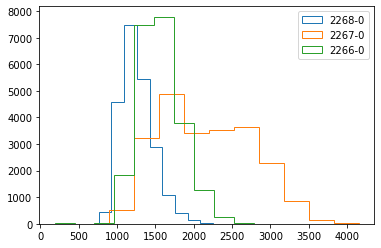

In [63]:
for im_name in HI_C6AU_PH7:
    
    img = SNOM_Import.SNOM_File(os.path.join(file_dir, im_name))

    plt.hist((img.images["FSNOM"].image).flatten(), label = im_name, histtype = "step")
    
plt.legend()

In [ ]:
dir(SNOM_Import)


2321-0_2311-0:- P:0.0 T:-231.7660371531633
Difference: [-0.52784055]
Difference: -0.4935870748954758

2317-0_2328-0:- P:0.0 T:-153.15774937166267
Difference: [0.17244324]
Difference: -0.351346612010371

2320-0_2313-0:- P:0.0 T:-307.48325228244516
Difference: [-0.49189491]
Difference: -0.8877535059934163

2316-0_2326-0:- P:0.0 T:-294.8431845245024
Difference: [-0.21743991]
Difference: -0.4342432147071611

2319-0_2312-0:- P:0.0 T:-217.82722504628157
Difference: [-0.60168196]
Difference: -0.6273878580974535

2315-0_2327-0:- P:0.0 T:2150.797768312395
Difference: [1.1028035]
Difference: 1.1376363529710511


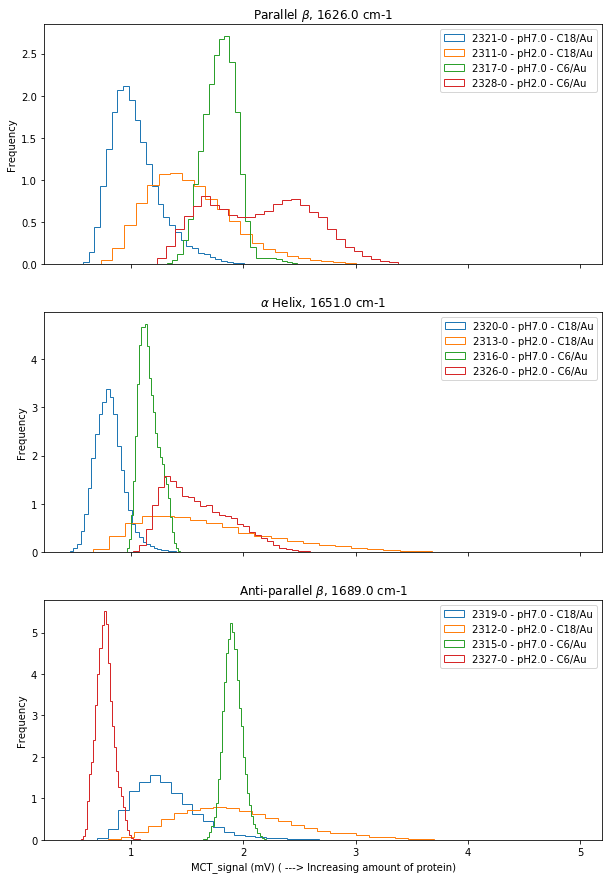

In [108]:
from scipy.stats import mode, ttest_ind

title = "Wavenumber"

fig, axes = plt.subplots(ncols = 1, nrows = 3, figsize = (10,15), sharex = True)

axes_f = axes.flatten()
i = 0

fig.set_title = title

for wn, df in im_objects_DF.groupby("wavenumber"):
    
    
